In [ ]:
%pip install weasyprint

In [1]:
# load packages
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from matplotlib.cm import get_cmap
from numpy.random import random
from pandasql import sqldf
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

C:\Users\Chirag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'benchmark.csv',
 'Data Mapping.ipynb',
 'EDA_Data_Understanding.ipynb',
 'env',
 'Files',
 'final_out.csv',
 'final_output.csv',
 'input.csv',
 'mapping.csv',
 'Outputs',
 'output_cleaned.csv',
 'report.html',
 'workspace.ipynb']

In [3]:
paths = glob.glob(path+"\\"+"*.csv")
paths

['c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\benchmark.csv',
 'c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\final_out.csv',
 'c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\final_output.csv',
 'c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\input.csv',
 'c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\mapping.csv',
 'c:\\Workspaces\\CodeSpaces\\Python_Work\\Jupyter_Notebook\\Data_Collection\\output_cleaned.csv']

In [ ]:
final_out = pd.read_csv(paths[1])
final_out

In [5]:
benchmark_out = pd.read_csv(paths[0])
benchmark_out

,MGA,Program Name,Issuing Company,Full policy number,Policy Effective Date,Policy Expiration Date,Insured Name,Insured Address,Insured City,Insured State,...,Regulatory and defense coverage,product and operations liability,liability (Tech E&O),Liability (Professional Services),Liability (Directors and Officers),Media,Financial Theft and fraud,Reputational Damages,Cyber Extortion,Intellectual Property Theft
0,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000025-00,06/25/2023,06/17/2024,Rego Realty Corporation,154 WESTLAND ST,HARTFORD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000043-00,07/31/2023,07/31/2024,TVC1 LLC,3540 N GRAPEVINE MILLS BLVD,GRAPEVINE,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000043-00,07/31/2023,07/31/2024,TVC1 LLC,3540 N GRAPEVINE MILLS BLVD,GRAPEVINE,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000043-00,07/31/2023,07/31/2024,TVC1 LLC,3540 N GRAPEVINE MILLS BLVD,GRAPEVINE,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arrowhead General Insurance Agency Inc,Arrowhead ES Primary General Liability,TSIC,TSAHGL0000044-00,08/02/2023,08/02/2024,"Gateway Commons HomeownerÂs Association, Inc.",6153 N CEYLON ST,DENVER,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Common Data Analysis

In [42]:

report = sv.analyze(benchmark_out)

# Displaying the report in a Jupyter notebook
# report.show_html('report.html')
report_df = report.show_html("report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)         


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [43]:
-- pysqldf = lambda q: sqldf(q, globals())

-- # SQL Query
-- query = "SELECT count(MGA) FROM final_out"

-- # Execute the query
-- result_df = pysqldf(query)

-- result_df

,count(MGA)
0,5336


<Axes: >

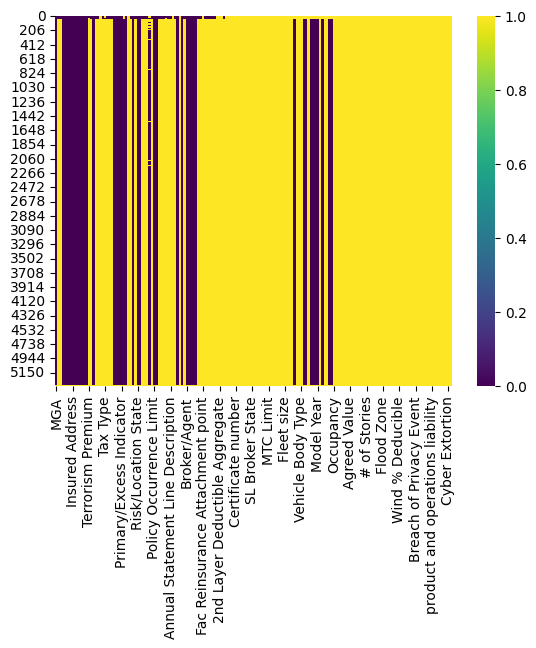

In [6]:
# Visualizing the Missing Values
sns.heatmap(final_out.isna(),cbar=True,cmap='viridis')

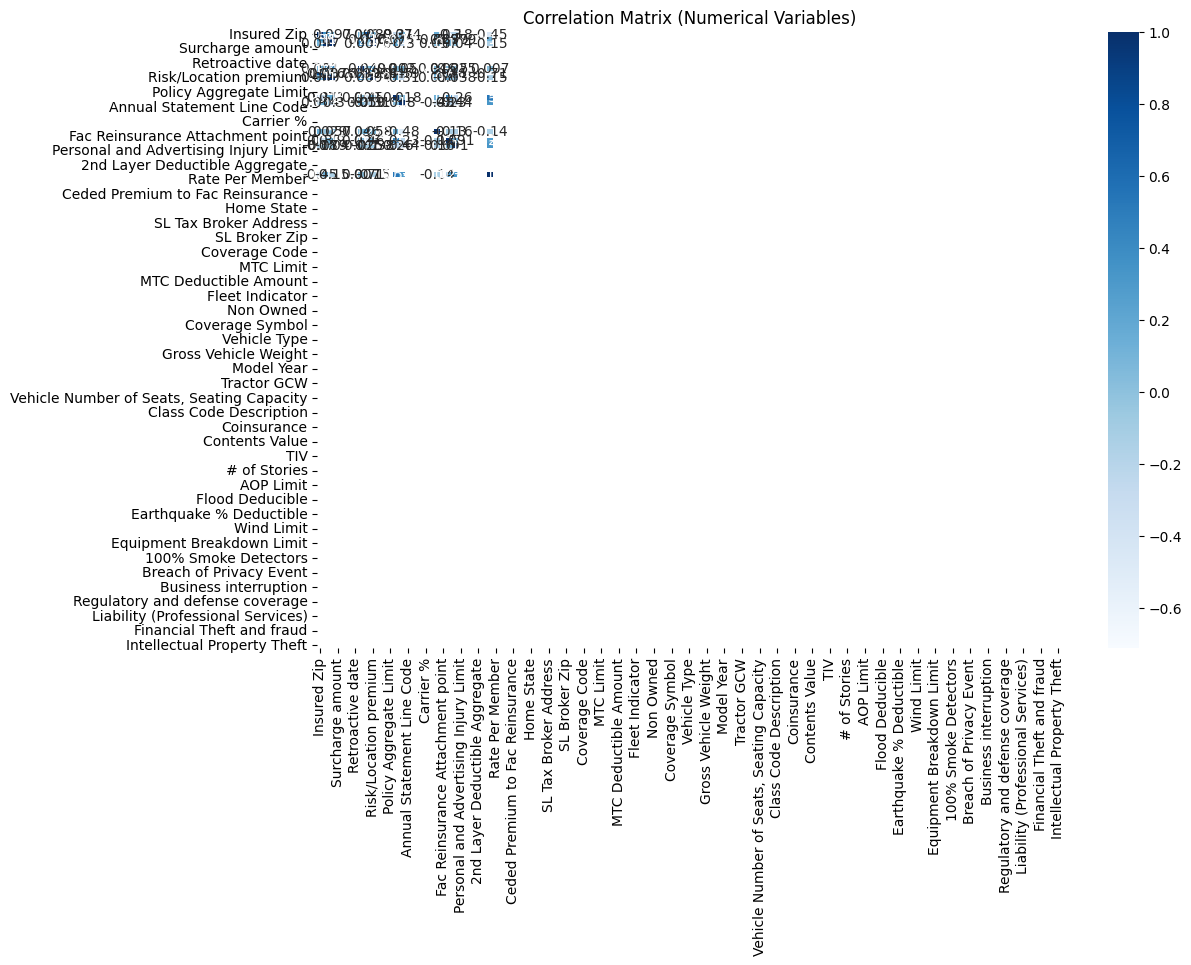

KeyboardInterrupt: 

In [9]:
# # Identify numerical columns
# numerical_columns = benchmark_out.select_dtypes(include=['float64', 'int64']).columns

# # Identify categorical columns
# categorical_columns = benchmark_out.select_dtypes(include=['object']).columns

# # Plot correlation matrix for numerical variables
# plt.figure(figsize=(12, 8))
# sns.heatmap(benchmark_out[numerical_columns].corr(), annot=True, cmap='Blues', cbar=True)
# plt.title('Correlation Matrix (Numerical Variables)')
# plt.show()

# # Plot association matrix for categorical variables
# plt.figure(figsize=(12, 8))
# sns.heatmap(pd.get_dummies(benchmark_out[categorical_columns]).corr(), annot=True, cmap='coolwarm', cbar=True)
# plt.title('Association Matrix (Categorical Variables)')
# plt.show()

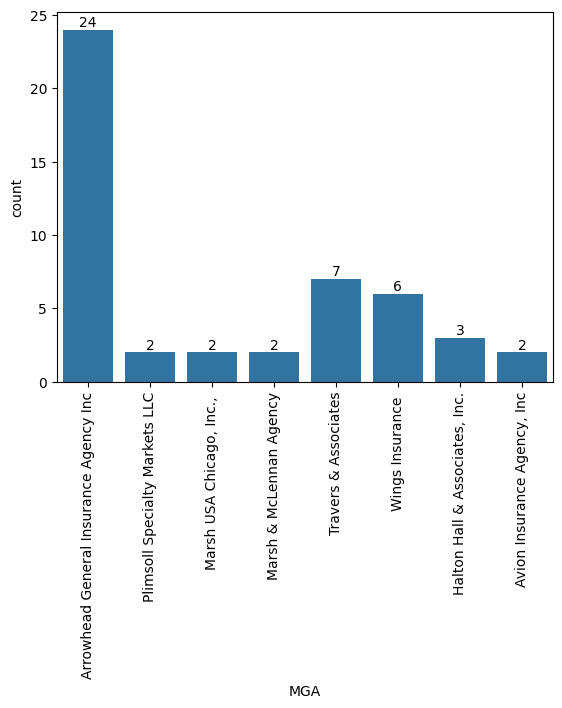

In [7]:
# plotting a bar chart for MGA and it's count
ax = sns.countplot(x = 'MGA',data = benchmark_out)
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
    
# sales_gen = benchmark_out.groupby(['MGA'], as_index=False)['Program Name'].sum().sort_values(by='Program Name', ascending=False)

# sns.barplot(x = 'MGA',y= 'Program Name' ,data = sales_gen)

In [8]:
final_out.columns.to_list()

['MGA',
 'Program Name',
 'Issuing Company',
 'Full policy number',
 'Policy Effective Date',
 'Policy Expiration Date',
 'Insured Name',
 'Insured Address',
 'Insured City',
 'Insured State',
 'Insured Zip',
 'Transaction Effective Date',
 'Transaction Expiration Date',
 'Premium',
 'Terrorism Premium',
 'Total Gross Premium including Terrorism',
 'Commission amount',
 'Net Premium',
 'Surcharge amount',
 'Surcharge type',
 'Tax Amount',
 'Tax Type',
 'Fee Amount',
 'Fee Type',
 'Payment terms',
 'Book or Process Date',
 'Policy Type',
 'Transaction Type',
 'Primary/Excess Indicator',
 'Attachment Point',
 'CM/Occ Indicator',
 'Retroactive date',
 'Risk/Location #',
 'Risk/Location Address',
 'Risk/Location City',
 'Risk/Location State',
 'Risk/Location Zip',
 'Risk/Location premium',
 'Technical Price',
 'IRPM (Individual Risk Premium Modification)',
 'Exposure Type',
 'Exposure Amount',
 'Policy Occurrence Limit',
 'Policy Aggregate Limit',
 'SIR/Deductible indicator',
 'SIR/Deducti

In [9]:
final_out.isna().sum()

MGA                               5
Program Name                   5293
Issuing Company                5293
Full policy number                5
Policy Effective Date             5
                               ... 
Media                          5341
Financial Theft and fraud      5341
Reputational Damages           5341
Cyber Extortion                5341
Intellectual Property Theft    5341
Length: 170, dtype: int64

In [11]:
# final_out.tail() extracting the last five rows

In [13]:
final_out.nunique() # extracting the non unique value count from the dataset

MGA                              9
Program Name                     2
Issuing Company                  3
Full policy number             544
Policy Effective Date          104
                              ... 
Media                            0
Financial Theft and fraud        0
Reputational Damages             0
Cyber Extortion                  0
Intellectual Property Theft      0
Length: 170, dtype: int64

In [14]:
(final_out.isnull().sum()/(len(final_out)))*100 


MGA                              0.093615
Program Name                    99.101292
Issuing Company                 99.101292
Full policy number               0.093615
Policy Effective Date            0.093615
                                  ...    
Media                          100.000000
Financial Theft and fraud      100.000000
Reputational Damages           100.000000
Cyber Extortion                100.000000
Intellectual Property Theft    100.000000
Length: 170, dtype: float64

In [53]:
print(final_out.MGA.unique())
# print(final_out.MGA.nunique())

['Arrowhead General Insurance Agency Inc' 'Plimsoll Specialty Markets LLC'
 'Marsh USA Chicago, Inc., ' 'Marsh & McLennan Agency'
 'Travers & Associates' 'Wings Insurance '
 'Halton Hall & Associates, Inc.' 'Avion Insurance Agency, Inc'
 'Daniel Abrahamsen' nan]


# 1. MGA

In [48]:
final_out['MGA'].isna().sum()

5

In [ ]:
final_out['MGA'].value_counts()

# mapping_Df = pd.read_csv(paths[1], usecols=['Target', 'Source'])
# mapping_Df

In [51]:
final_out["MGA"].shape[0]

5341

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Arrowhead General Insurance Agency Inc'),
  Text(1, 0, 'Plimsoll Specialty Markets LLC'),
  Text(2, 0, 'Marsh USA Chicago, Inc., '),
  Text(3, 0, 'Marsh & McLennan Agency'),
  Text(4, 0, 'Travers & Associates'),
  Text(5, 0, 'Wings Insurance '),
  Text(6, 0, 'Halton Hall & Associates, Inc.'),
  Text(7, 0, 'Avion Insurance Agency, Inc'),
  Text(8, 0, 'Daniel Abrahamsen')])

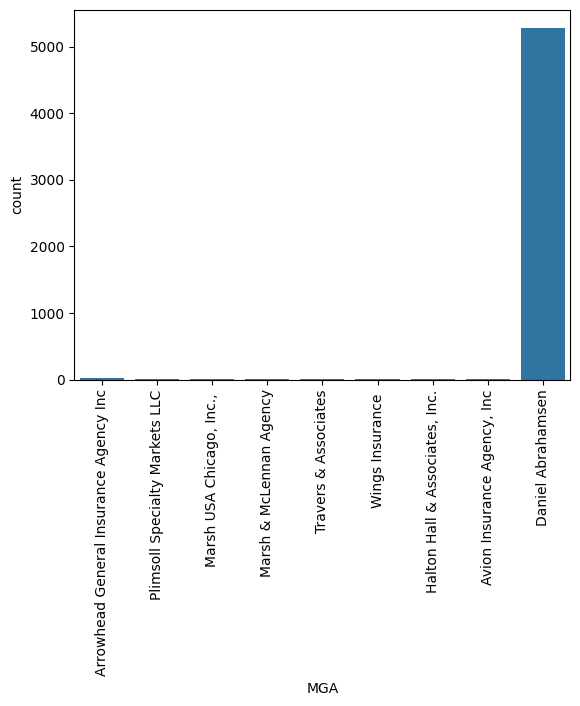

In [22]:
sns.countplot(x=final_out["MGA"])
# plt.figure(figsize=(100,100))
plt.xticks(rotation= 90)

# 2 Program Name

In [23]:
final_out["Program Name"].isna().sum()

5293

In [24]:
final_out["Program Name"].value_counts()

Program Name
Arrowhead ES Primary General Liability    24
Non Admitted                              24
Name: count, dtype: int64

<Axes: xlabel='Program Name', ylabel='count'>

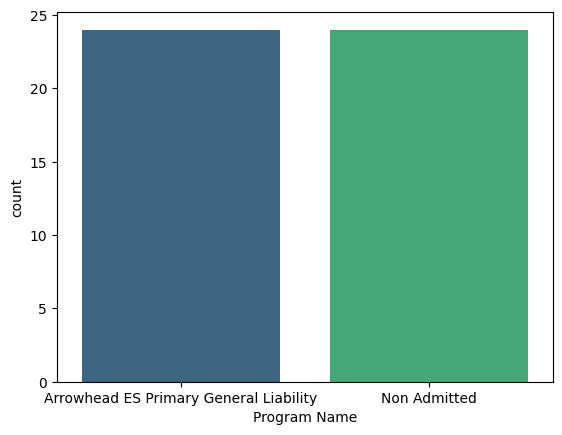

In [68]:
# sns.countplot(x=final_out["Program Name"])
# cmap = get_cmap('viridis')  # You can choose any Matplotlib colormap
# num_categories = len(categories)
# bar_colors = cmap(random(num_categories))

# # Create a bar plot with dynamic colors
# plt.bar(categories, values, color=bar_colors)

# # Show the plot
# plt.show()

sns.countplot(x=final_out["Program Name"], palette='viridis')

# # Get unique categories and counts
# categories, counts = final_out["Program Name"].value_counts().index, final_out["Program Name"].value_counts().values

# # Generate random colors using a colormap
# cmap = get_cmap('viridis')  # You can choose any Matplotlib colormap
# num_categories = len(categories)
# bar_colors = cmap(random(num_categories))

# # Create a bar plot with dynamic colors
# plt.bar(categories, counts, color=bar_colors)

# # Show the plot
# plt.show()

# 3 Issuing Company

In [26]:
final_out["Issuing Company"].isna().sum()

5293

In [27]:
final_out["Issuing Company"].value_counts()

Issuing Company
TSIC                                      24
Transverse Insurance Company              18
Transverse Specialty Insurance Company     6
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'TSIC'),
  Text(1, 0, 'Transverse Specialty Insurance Company'),
  Text(2, 0, 'Transverse Insurance Company')])

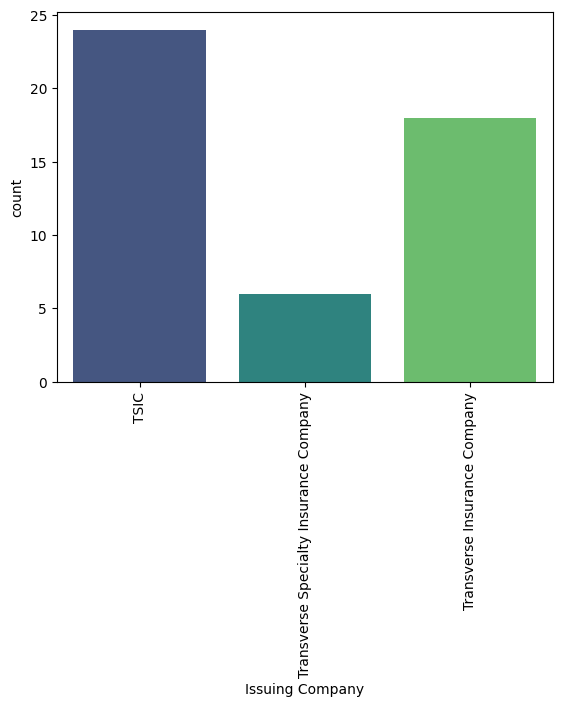

In [69]:
sns.countplot(x=final_out["Issuing Company"], palette='viridis')
plt.xticks(rotation = 90)

# 4 Full policy number

In [30]:
final_out["Full policy number"].isna().sum()

5

In [31]:
final_out.shape[0]

5341

In [32]:
final_out["Full policy number"].value_counts()

Full policy number
ASC-8522134-00       128
ASC-2942196-00       108
ASC-1244429-00       100
ASC-1757770-00        88
ASC-8403867-00        80
                    ... 
TIBAAN 0000001-00      1
TSBAAC 0000091-00      1
TIBAAN 0000067-00      1
TSBAAG 0000092-00      1
TIBAAN 0009002-00      1
Name: count, Length: 544, dtype: int64

<Axes: xlabel='Full policy number', ylabel='count'>

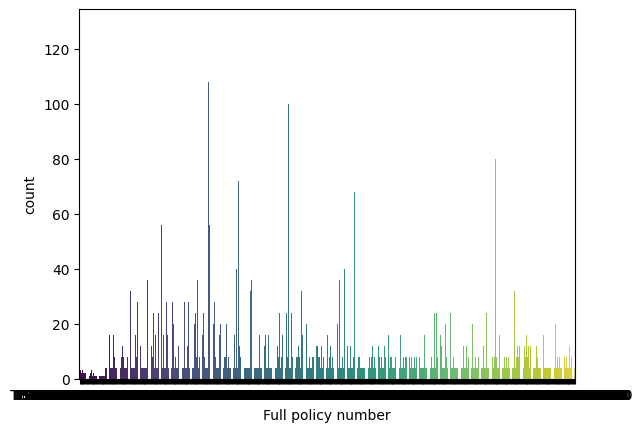

In [70]:
sns.countplot(x=final_out["Full policy number"], palette='viridis')
# plt.xticks(rotation=90)

# 5 Insured Name

In [36]:
final_out["Insured Name"].isna().sum()

5

In [37]:
final_out["Insured Name"].value_counts()

Insured Name
QUALITY CARRIER TRANSPORT INC                       128
MER CARGO LLC                                       108
SMART FREIGHT EXPRESS INC                           100
HOYER TRUCKING LLC                                   88
PEPE' S FOODS INC                                    80
                                                   ... 
THM Holdings LLC                                      1
Rafter K LLC                                          1
Ward Aviation, LLC                                    1
ZMN Enterprises, LLC and Centurion Holdings, LLC      1
Kupau Inc                                             1
Name: count, Length: 545, dtype: int64

<Axes: xlabel='Insured Name', ylabel='count'>

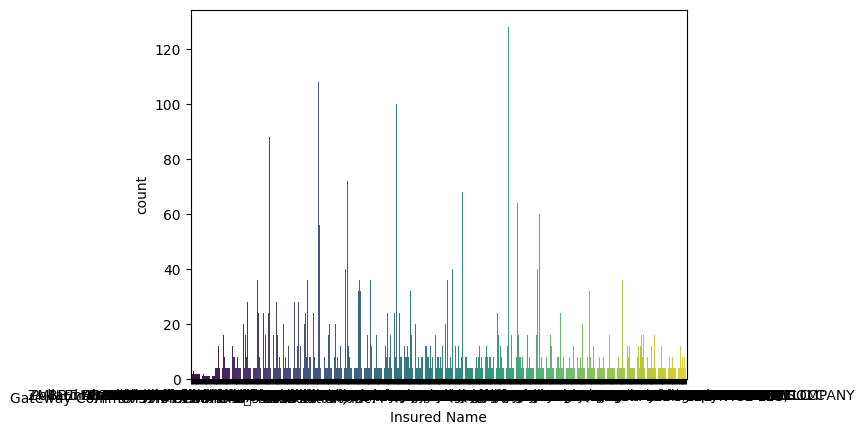

In [71]:
sns.countplot(x=final_out["Insured Name"], palette='viridis')

# 6 Insured Address

In [39]:
final_out["Insured Address"].isna().sum()

5

In [41]:
final_out["Insured Address"].value_counts()

Insured Address
5814 ZURICH RD                   128
2399 SOUTH ORCHARD STREET STE    108
1036 REDER RD                    100
PO BOX 1351 ODESSA                88
20551 Corsair Blvd                80
                                ... 
8963 California Palm Rd            4
1028 North Linden Avenue           4
136 PECAN TER                      4
8161 SHASTA ST                     4
11602 Trail Point Drive            4
Name: count, Length: 532, dtype: int64

<Axes: xlabel='Insured Address', ylabel='count'>

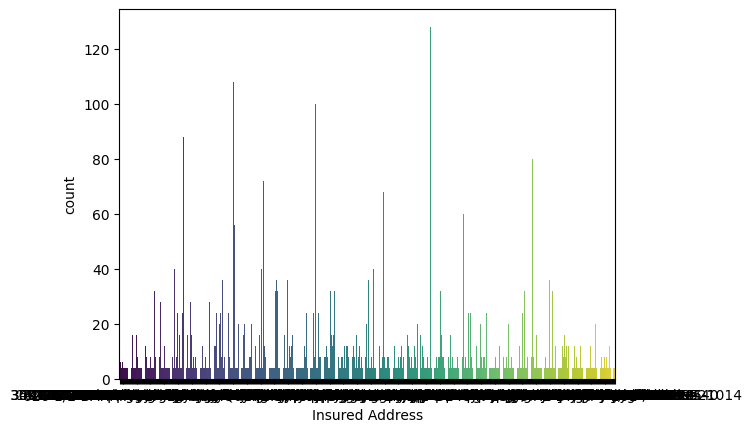

In [72]:
sns.countplot(x=final_out["Insured Address"], palette='viridis')

# 7 Insured City

In [43]:
final_out["Insured City"].isna().sum()

5

In [44]:
final_out["Insured City"].value_counts()

Insured City
SMYRNA            128
BOISE             124
Fresno            100
GRIFFITH          100
ODESSA             88
                 ... 
Payette             1
Bryant              1
Lake Oswego         1
Grand Rapids        1
SINKING SPRING      1
Name: count, Length: 422, dtype: int64

<Axes: xlabel='Insured City', ylabel='count'>

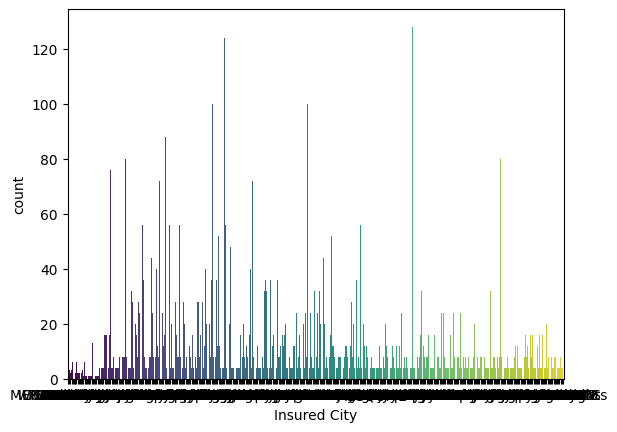

In [73]:
sns.countplot(x=final_out["Insured City"], palette='viridis')

# 8 Insured State

In [47]:
final_out["Insured State"]

0        CT
1        CT
2        CT
3        CT
4        CT
       ... 
5336    NaN
5337    NaN
5338    NaN
5339    NaN
5340    NaN
Name: Insured State, Length: 5341, dtype: object

In [48]:
final_out["Insured State"].isna().sum()

5

In [49]:
final_out["Insured State"].value_counts()

Insured State
CA    1012
TX     917
GA     677
FL     542
OH     516
PA     229
NJ     192
TN     176
IN     132
ID     129
MI     125
AL     120
AR      97
AZ      96
MS      84
MO      77
NY      42
OK      32
DE      20
MN      20
LA      20
OR      17
UT      15
CO      12
MD       8
WV       8
IL       6
CT       6
NV       3
AK       2
SC       2
HI       1
MT       1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'CT'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'CO'),
  Text(3, 0, 'NV'),
  Text(4, 0, 'IL'),
  Text(5, 0, 'SC'),
  Text(6, 0, 'FL'),
  Text(7, 0, 'NY'),
  Text(8, 0, 'AK'),
  Text(9, 0, 'UT'),
  Text(10, 0, 'MT'),
  Text(11, 0, 'MO'),
  Text(12, 0, 'HI'),
  Text(13, 0, 'GA'),
  Text(14, 0, 'ID'),
  Text(15, 0, 'AR'),
  Text(16, 0, 'PA'),
  Text(17, 0, 'OR'),
  Text(18, 0, 'MI'),
  Text(19, 0, 'CA'),
  Text(20, 0, 'OH'),
  Text(21, 0, 'NJ'),
  Text(22, 0, 'AZ'),
  Text(23, 0, 'MS'),
  Text(24, 0, 'TN'),
  Text(25, 0, 'AL'),
  Text(26, 0, 'DE'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'IN'),
  Text(29, 0, 'MD'),
  Text(30, 0, 'MN'),
  Text(31, 0, 'WV'),
  Text(32, 0, 'LA')])

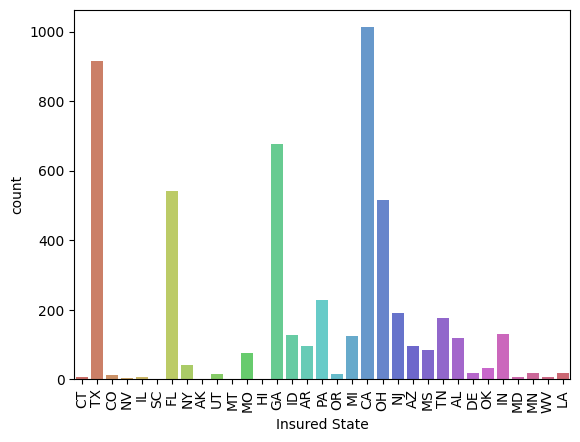

In [78]:
sns.countplot(x=final_out["Insured State"], palette='hls')
plt.xticks(rotation=90)

# 9 Insured Zip

In [52]:
final_out["Insured Zip"].isna().sum()

5

In [53]:
final_out["Insured Zip"].value_counts()

Insured Zip
37167         128
83705-3989    108
46319         100
79760          88
94545          80
             ... 
20602           4
71749           4
30253           4
43611-3431      4
77377           4
Name: count, Length: 493, dtype: int64

<Axes: xlabel='Insured Zip', ylabel='count'>

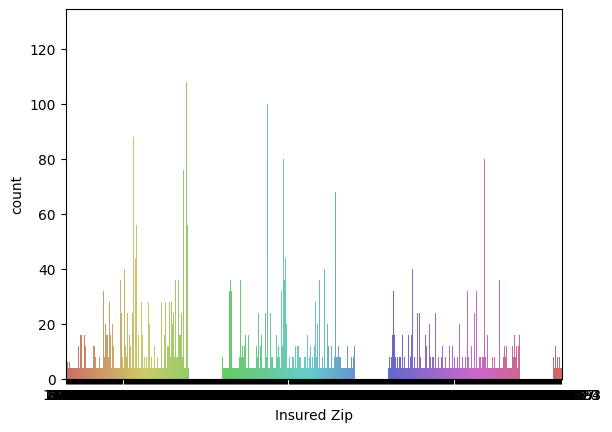

In [80]:
sns.countplot(x=final_out["Insured Zip"], palette='hls')


# 10 Premium

In [59]:
final_out["Premium"].isna().sum()

5

In [60]:
final_out["Premium"].value_counts()

Premium
0           2717
100          104
 $-           35
0.01          27
10885.31      25
            ... 
293.29         1
26685.68       1
979.5          1
41.53          1
137.05         1
Name: count, Length: 1590, dtype: int64

<Axes: xlabel='Premium', ylabel='count'>

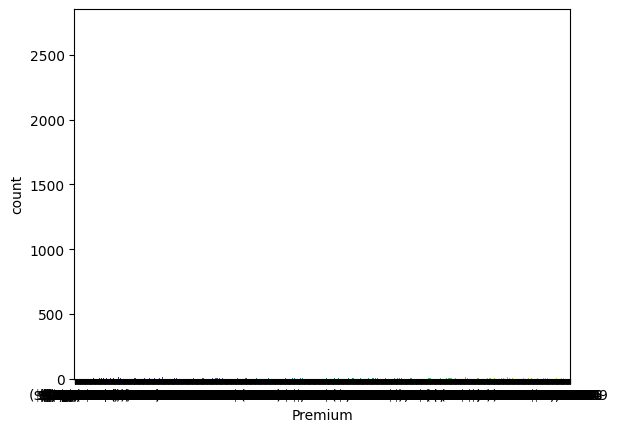

In [76]:
sns.countplot(x=final_out["Premium"], palette='viridis')

# 11 Terrorism Premium

In [81]:
final_out["Terrorism Premium"].isna().sum()

5307

In [82]:
final_out["Terrorism Premium"].value_counts()

Terrorism Premium
 0.00       22
 15.00       4
-15.00       2
 25.11       2
 4924.92     2
 1339.50     2
Name: count, dtype: int64

<Axes: xlabel='Terrorism Premium', ylabel='count'>

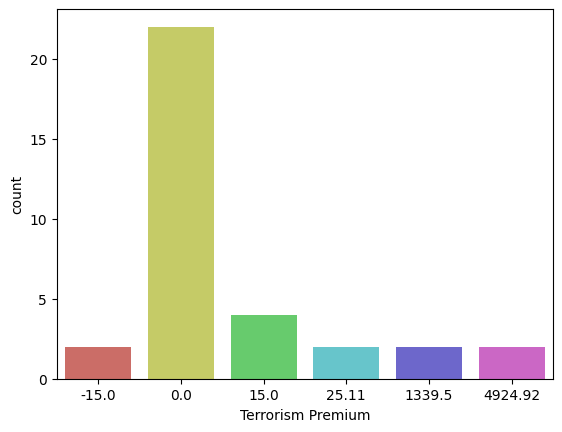

In [84]:
sns.countplot(x=final_out["Terrorism Premium"], palette="hls")

# 12 Total Gross Premium including Terrorism

In [89]:
final_out["Total Gross Premium including Terrorism"].isna().sum()

5293

In [90]:
final_out["Total Gross Premium including Terrorism"].value_counts()

Total Gross Premium including Terrorism
0                 11
515                2
$56,978.00         1
$6,300.00          1
($1,06,984.00)     1
$250.00            1
($6,282.00)        1
$6,272.00          1
$32,294.00         1
$4,245.00          1
$4,514.00          1
$1,203.00          1
$8,945.10          1
$48,852.00         1
$3,091.69          1
$43,182.00         1
$1,728.00          1
$11,693.00         1
$11,019.00         1
$97,864.00         1
$7,500.00          1
45989              1
-515               1
5750               1
14250              1
10000              1
5787               1
169114             1
43000              1
($7,500.00)        1
80000              1
75000              1
270000             1
$3,185.38          1
$16,577.50         1
$206.25            1
($11,332.00)       1
Name: count, dtype: int64

<Axes: xlabel='Total Gross Premium including Terrorism', ylabel='count'>

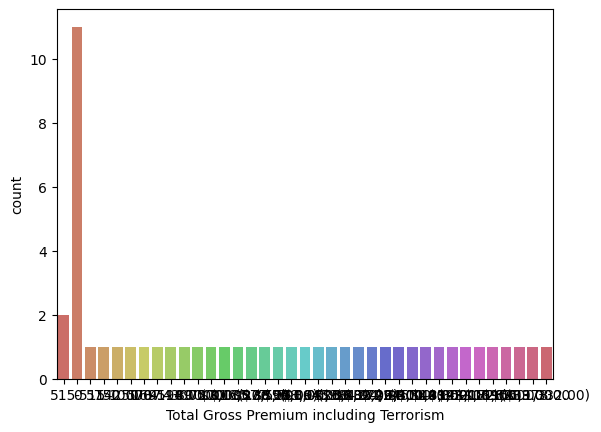

In [91]:
sns.countplot(x=final_out["Total Gross Premium including Terrorism"], palette="hls")

# 13 Commission amount

In [92]:
final_out["Commission amount"].isna().sum()

5

In [93]:
final_out["Commission amount"].value_counts()

Commission amount
0.0        2098
0.0         703
17.5         74
17.5         30
1904.93      25
           ... 
55.98         1
51.33         1
4669.99       1
171.41        1
23.98         1
Name: count, Length: 1566, dtype: int64

<Axes: xlabel='Commission amount', ylabel='count'>

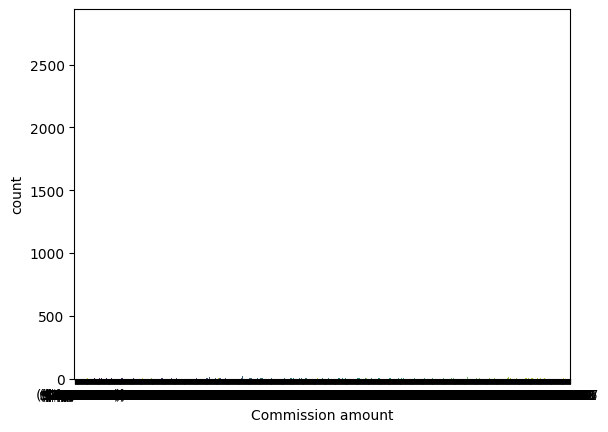

In [94]:
sns.countplot(x=final_out["Commission amount"], palette="viridis")

# 14 Net Premium

In [95]:
final_out["Net Premium"].isna().sum()

5293

In [96]:
final_out["Net Premium"].value_counts()

Net Premium
 0.00         22
 427.45        4
-427.45        2
 4772.50       2
 11827.50      2
 8300.00       2
 4803.21       2
 140364.62     2
 38170.87      2
 35690.00      2
 66400.00      2
 62250.00      2
 224100.00     2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '-427.45'),
  Text(1, 0, '0.0'),
  Text(2, 0, '427.45'),
  Text(3, 0, '4772.5'),
  Text(4, 0, '4803.21'),
  Text(5, 0, '8300.0'),
  Text(6, 0, '11827.5'),
  Text(7, 0, '35690.0'),
  Text(8, 0, '38170.87'),
  Text(9, 0, '62250.0'),
  Text(10, 0, '66400.0'),
  Text(11, 0, '140364.62'),
  Text(12, 0, '224100.0')])

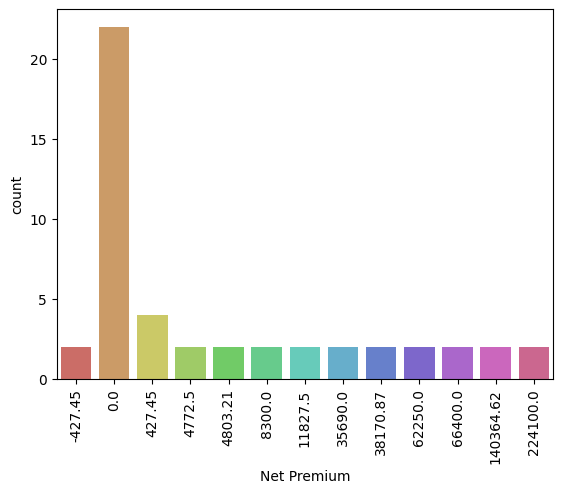

In [99]:
sns.countplot(x=final_out["Net Premium"], palette="hls")
plt.xticks(rotation=90)

# 15 Tax Type

In [100]:
final_out["Tax Type"].isna().sum()

5317

In [101]:
final_out["Tax Type"].value_counts()

Tax Type
Non Admitted    24
Name: count, dtype: int64

<Axes: xlabel='Tax Type', ylabel='count'>

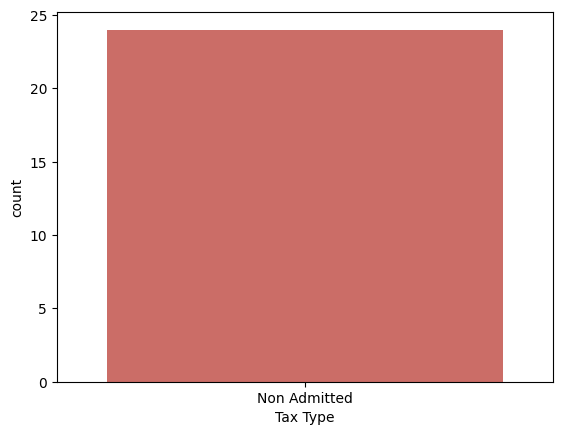

In [102]:
sns.countplot(x=final_out["Tax Type"], palette="hls")

# 16 Fee Amount

In [103]:
final_out["Fee Amount"].isna().sum()

5293

In [104]:
final_out["Fee Amount"].value_counts()

Fee Amount
$0.00       22
0           13
100          2
1000         2
-100         1
8250         1
2500         1
2150         1
4000         1
3750         1
15400        1
$126.00      1
$90.28       1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0'),
  Text(1, 0, '-100'),
  Text(2, 0, '100'),
  Text(3, 0, '1000'),
  Text(4, 0, '8250'),
  Text(5, 0, '2500'),
  Text(6, 0, '2150'),
  Text(7, 0, '4000'),
  Text(8, 0, '3750'),
  Text(9, 0, '15400'),
  Text(10, 0, '$0.00 '),
  Text(11, 0, '$126.00 '),
  Text(12, 0, '$90.28 ')])

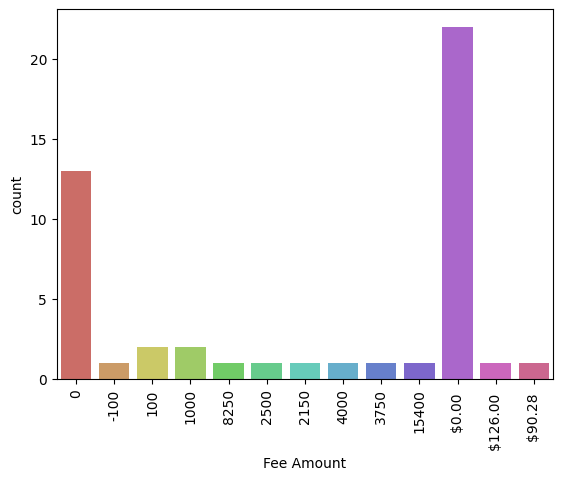

In [106]:
sns.countplot(x=final_out["Fee Amount"], palette="hls")
plt.xticks(rotation=90)

# 17 Fee Type

In [107]:
SELECT * FROM Final_out

SyntaxError: invalid syntax (922419770.py, line 1)